In [14]:
import pandas as pd
import tweepy 


In [15]:
# Using the consumer keys and access key to extract the tweets from twitter
consumer_key = "YjpUMq8F0Vc15DrmDT1dVNHYO"
consumer_secret = "hqqKizfetGcQGDziLVHguaBRMKqujnC98GRzp4BaVWIy2YdtQi"
access_key = "2821184361-nI4ZUrqAhJ3bQq0e15rUuFMXbHTK3VuJvIoVWHp"
access_secret = "ltXVMn0Iqn7GJnJwFXUDDIxgB7Zw4ne0uL8B1qzlcjj47"

In [16]:
alltweets = []	

def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

joe_tweets = get_all_tweets("JoeBiden")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3200 tweets downloaded so far
...3222 tweets downloaded so far
...3222 tweets downloaded so far


In [17]:
# Checking the extracted tweets
joe_tweets


,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-27 18:46:38,[],"[{'screen_name': 'POTUS', 'name': 'President B...",0,None,1354501085478625281,en,None,5648,False,Twitter for iPhone,"RT @POTUS: This afternoon, I’ll be taking acti...","Wilmington, DE",Joe Biden,None,None
1,2021-01-24 02:49:49,[],"[{'screen_name': 'POTUS', 'name': 'President B...",0,None,1353173127673520128,en,None,14795,False,Twitter for iPhone,RT @POTUS: We’re facing a historic moment in o...,"Wilmington, DE",Joe Biden,None,None
2,2021-01-24 02:49:45,[],"[{'screen_name': 'POTUS', 'name': 'President B...",0,None,1353173113417076736,en,None,10912,False,Twitter for iPhone,"RT @POTUS: We will get through this, together....","Wilmington, DE",Joe Biden,None,None
3,2021-01-23 01:57:08,[],"[{'screen_name': 'POTUS', 'name': 'President B...",0,None,1352797482435055618,en,None,15177,False,Twitter for iPhone,RT @POTUS: Federal employees have dedicated th...,"Wilmington, DE",Joe Biden,None,None
4,2021-01-23 01:56:57,[],"[{'screen_name': 'POTUS', 'name': 'President B...",0,None,1352797437795029000,en,None,8745,False,Twitter for iPhone,"RT @POTUS: I know times are tough, but help is...","Wilmington, DE",Joe Biden,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2020-02-26 20:14:00,[],[],2620,None,1232760746523516930,en,None,814,False,Twitter Media Studio,We need policies that allow Black Americans to...,"Wilmington, DE",Joe Biden,None,None
3218,2020-02-26 17:54:00,[],[],44768,None,1232725514399301633,en,None,5634,False,TweetDeck,We need to put a black woman on the Supreme Co...,"Wilmington, DE",Joe Biden,None,None
3219,2020-02-26 16:52:00,[],[],2084,None,1232709911621951491,en,None,743,False,Twitter Media Studio,I know that with folks like Bernice and the Re...,"Wilmington, DE",Joe Biden,None,None
3220,2020-02-26 15:08:11,[],[],19065,None,1232683784954359808,en,None,5868,False,Twitter Media Studio,Jim Clyburn is a voice of powerful moral clari...,"Wilmington, DE",Joe Biden,None,None


In [18]:
# Extracting only the 'text' section of the tweet
joe_tweets["text"]

0       RT @POTUS: This afternoon, I’ll be taking acti...
1       RT @POTUS: We’re facing a historic moment in o...
2       RT @POTUS: We will get through this, together....
3       RT @POTUS: Federal employees have dedicated th...
4       RT @POTUS: I know times are tough, but help is...
                              ...                        
3217    We need policies that allow Black Americans to...
3218    We need to put a black woman on the Supreme Co...
3219    I know that with folks like Bernice and the Re...
3220    Jim Clyburn is a voice of powerful moral clari...
3221    Team, we had a great debate tonight in South C...
Name: text, Length: 3222, dtype: object

In [19]:
# Combining all the tweets into a single paragraph
tweet_df = " ".join(joe_tweets["text"])
tweet_df


'RT @POTUS: This afternoon, I’ll be taking action to meet the climate crisis with the urgency it demands. Tune in. https://t.co/TaCmltDZ6X RT @POTUS: We’re facing a historic moment in our nation’s history — one that requires bold and swift action. That’s why this week, I took h… RT @POTUS: We will get through this, together. https://t.co/W03wlb2m8o RT @POTUS: Federal employees have dedicated their careers to serving the American people — and they are worthy of the utmost dignity and re… RT @POTUS: I know times are tough, but help is on the way. https://t.co/BVi3b6NoBv RT @POTUS: This afternoon, I’ll be taking action to provide much-needed relief to communities and small businesses impacted by COVID-19. Tu… RT @POTUS: As we mark the 48th anniversary of Roe v. Wade, now is the time to rededicate ourselves to the work ahead. From codifying Roe to… RT @POTUS: I’m grateful for the Senate’s continued bipartisanship and swift confirmation of Lloyd Austin. His confirmation is historic — an… RT

In [21]:
#Text processing
import re
# Removing all the http links from the tweets
tweet_df = re.sub(r"http\S+", "", tweet_df)
tweet_df


'RT @POTUS: This afternoon, I’ll be taking action to meet the climate crisis with the urgency it demands. Tune in.  RT @POTUS: We’re facing a historic moment in our nation’s history — one that requires bold and swift action. That’s why this week, I took h… RT @POTUS: We will get through this, together.  RT @POTUS: Federal employees have dedicated their careers to serving the American people — and they are worthy of the utmost dignity and re… RT @POTUS: I know times are tough, but help is on the way.  RT @POTUS: This afternoon, I’ll be taking action to provide much-needed relief to communities and small businesses impacted by COVID-19. Tu… RT @POTUS: As we mark the 48th anniversary of Roe v. Wade, now is the time to rededicate ourselves to the work ahead. From codifying Roe to… RT @POTUS: I’m grateful for the Senate’s continued bipartisanship and swift confirmation of Lloyd Austin. His confirmation is historic — an… RT @POTUS: We will get this virus under control.  RT @POTUS: I give you

In [22]:
# Removing all the puntuations, numbers and lowering the case of  letters
tweets = re.sub("[^A-Za-z" "]+"," ",tweet_df).lower()
tweets = re.sub("[0-9" "]+"," ",tweets)
tweets

'rt potus this afternoon i ll be taking action to meet the climate crisis with the urgency it demands tune in rt potus we re facing a historic moment in our nation s history one that requires bold and swift action that s why this week i took h rt potus we will get through this together rt potus federal employees have dedicated their careers to serving the american people and they are worthy of the utmost dignity and re rt potus i know times are tough but help is on the way rt potus this afternoon i ll be taking action to provide much needed relief to communities and small businesses impacted by covid tu rt potus as we mark the th anniversary of roe v wade now is the time to rededicate ourselves to the work ahead from codifying roe to rt potus i m grateful for the senate s continued bipartisanship and swift confirmation of lloyd austin his confirmation is historic an rt potus we will get this virus under control rt potus i give you my word i will always level with you i will defend the 

In [23]:
# Splitting the paragraph into words
tweet_words = tweets.split(" ")
tweet_words
len(tweet_words)


61770

In [25]:
from google.colab import files
uploaded = files.upload()


Saving stop.txt to stop.txt


In [26]:
import io
stop = pd.read_csv(io.StringIO(uploaded['stop.txt'].decode('utf-8')))

In [28]:
stop.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [29]:
# Removing all the stop words from the tweets
tweets_final = [w for w in tweet_words if not w in stop]
tweets_final
len(tweets_final)


60521

In [30]:
# Joining all the tweet words into one paragraph
tweets_final_string = " ".join(tweets_final)
tweets_final_string


'rt potus this afternoon i ll be taking action to meet the climate crisis with the urgency it demands tune in rt potus we re facing historic moment in our nation s history one that requires bold and swift action that s why this week i took h rt potus we will get through this together rt potus federal employees have dedicated their careers to serving the american people and they are worthy of the utmost dignity and re rt potus i know times are tough but help is on the way rt potus this afternoon i ll be taking action to provide much needed relief to communities and small businesses impacted by covid tu rt potus as we mark the th anniversary of roe v wade now is the time to rededicate ourselves to the work ahead from codifying roe to rt potus i m grateful for the senate s continued bipartisanship and swift confirmation of lloyd austin his confirmation is historic an rt potus we will get this virus under control rt potus i give you my word i will always level with you i will defend the co

In [31]:
#Sentimental analysis
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


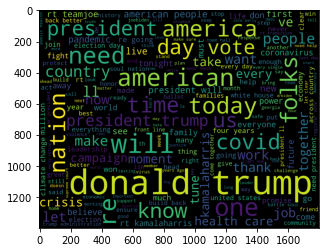

In [32]:
# Plotting a wordcloud with all the unique words in the tweets
wordcloud_tweet = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweets_final_string)
plt.imshow(wordcloud_tweet)


In [33]:
# List of all the unique words in the reviews
tweet_unique = list(set("".join(tweets_final_string).split(" ")))
tweet_unique
len(tweet_unique)


5362

In [34]:
from google.colab import files
uploaded = files.upload()


Saving positive-words.txt to positive-words.txt


In [54]:
with open(r'positive-words.txt', 'r') as f:

    poswords=f.read()

vocab = sorted(set(poswords))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in poswords], dtype=np.int32)

In [55]:
poswords.split
poswords = poswords[36:]


In [58]:
from google.colab import files
uploaded = files.upload()


Saving negative-words.txt to negative-words.txt


In [64]:
with open(r'negative-words.txt', 'r',encoding="ISO-8859-1") as f:

    negwords=f.read()

vocab = sorted(set(negwords))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in negwords], dtype=np.int32)

In [65]:
negwords.split
negwords = negwords[37:]


In [68]:
# Joining all the negative words into a paragraph
tweet_neg = " ".join([w for w in tweets_final if w in negwords])
tweet_neg
len(tweet_neg)


164224

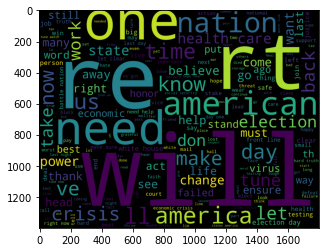

In [69]:
# Builiding wordcloud of negative words
wordcloud_neg = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweet_neg)
plt.imshow(wordcloud_neg)


In [70]:
# Joining all the positive words into a paragraph
tweet_pos= " ".join([w for w in tweets_final if w in poswords])
tweet_pos
len(tweet_pos)


151470

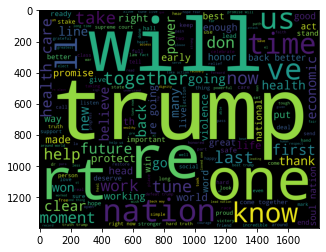

In [71]:
# Builiding wordcloud of positive words
wordcloud_pos = WordCloud(
                background_color="black",
                width=1800,
                height=1400,
                ).generate(tweet_pos)
plt.imshow(wordcloud_pos)


### Positive word count = 151470
### Negative word count = 164224

### Since the negative word count > positive word count
### It is Negative Sentiment.